# Problem Statement: Given the attributes of football players such as age, nationality, overall rating, position, etc., predict whether a player is a Forward, Midfielder, Defender, or Goalkeeper.

 From this we can say that according to the problem statement taken we are considering the position column as target column and the following columns to help us predict the target are Age,Nationality,Overall,Club,BP(The Best position of the player),Attacking and defending scores and GK Diving: The diving ability of the player (for goalkeepers only),GK Handling: The handling ability of the player (for goalkeepers only),GK Kicking: The kicking ability of the player (for goalkeepers only),GK Positioning: The positioning ability of the player (for goalkeepers only),GK Reflexes: The reflexes ability of the player (for goalkeepers only).

In [65]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import warnings
warnings.filterwarnings("ignore")

In [66]:
df=pd.read_csv("fifa.csv")

In [67]:
df

,ID,Name,Age,Overall,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,A. Medioub,22,64,France,CD Tondela,66,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,...,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
17121,259090,W. Rickard,18,56,Wales,Burnley,58,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,...,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
17122,259091,C. Barrett,18,56,England,Burnley,56,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,...,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male
17123,259101,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,62,RB,RB LB,https://cdn.sofifa.com/players/259/101/20_120.png,...,58+2,58+2,60+2,60+2,58+2,58+2,58+2,60+2,16+2,Male


In [68]:
df.head()

,ID,Name,Age,Overall,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [69]:
df.tail()

,ID,Name,Age,Overall,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
17120,259088,A. Medioub,22,64,France,CD Tondela,66,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,...,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
17121,259090,W. Rickard,18,56,Wales,Burnley,58,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,...,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
17122,259091,C. Barrett,18,56,England,Burnley,56,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,...,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male
17123,259101,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,62,RB,RB LB,https://cdn.sofifa.com/players/259/101/20_120.png,...,58+2,58+2,60+2,60+2,58+2,58+2,58+2,60+2,16+2,Male
17124,259105,Pablo Rodríguez,18,59,Spain,Lecce,61,ST,ST,https://cdn.sofifa.com/players/259/105/20_120.png,...,32+2,32+2,36+2,34+2,30+2,30+2,30+2,34+2,14+2,Male


In [70]:
df.columns.tolist()

['ID',
 'Name',
 'Age',
 'Overall',
 'Nationality',
 'Club',
 'BOV',
 'BP',
 'Position',
 'Player Photo',
 'Club Logo',
 'Flag Photo',
 'POT',
 'Team & Contract',
 'Height',
 'Weight',
 'foot',
 'Growth',
 'Joined',
 'Loan Date End',
 'Value',
 'Wage',
 'Release Clause',
 'Contract',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'W/F',
 'SM',
 'A/W',
 'D/W',
 'IR',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY

In [71]:
df.shape

(17125, 107)

In [72]:
df.isnull().sum()

ID             0
Name           0
Age            0
Overall        0
Nationality    0
              ..
CB             0
RCB            0
RB             0
GK             0
Gender         0
Length: 107, dtype: int64

In [73]:
df.describe(include='all')

,ID,Name,Age,Overall,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
count,17125.000000,17125,17125.000000,17125.000000,17125,17102,17125.000000,17125,16712,17125,...,17125,17125,17125,17125,17125,17125,17125,17125,17125,17125
unique,NaN,16176,NaN,NaN,167,917,NaN,15,622,17125,...,312,312,279,275,328,328,328,275,169,1
top,NaN,J. Rodríguez,NaN,NaN,England,Chelsea,NaN,CB,CB,https://cdn.sofifa.com/players/000/002/16_120.png,...,61+2,61+2,59+2,63+2,63+2,63+2,63+2,63+2,16+2,Male
freq,NaN,10,NaN,NaN,1707,45,NaN,3252,2047,1,...,508,508,621,566,451,451,451,566,3134,17125
mean,219388.716204,NaN,25.272934,66.965022,NaN,NaN,67.900204,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,37499.197507,NaN,4.942665,6.864329,NaN,NaN,6.637538,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.000000,NaN,16.000000,38.000000,NaN,NaN,42.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,204082.000000,NaN,21.000000,62.000000,NaN,NaN,64.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,228961.000000,NaN,25.000000,67.000000,NaN,NaN,68.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,243911.000000,NaN,29.000000,72.000000,NaN,NaN,72.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
df.dtypes

ID              int64
Name           object
Age             int64
Overall         int64
Nationality    object
                ...  
CB             object
RCB            object
RB             object
GK             object
Gender         object
Length: 107, dtype: object

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Columns: 107 entries, ID to Gender
dtypes: float64(10), int64(45), object(52)
memory usage: 14.0+ MB


In [76]:
print('Number of Categorical Columns: ', len(df.select_dtypes(include=object).columns))
print('Number of Numerical Columns: ', len(df.select_dtypes(exclude=object).columns))


Number of Categorical Columns:  52
Number of Numerical Columns:  55


In [77]:
data = df[['Age','Overall','Nationality','Club','BP','Height','Weight','foot','Crossing','Finishing','Heading Accuracy','Dribbling','Ball Control','Acceleration','Sprint Speed','Agility','Aggression','Composure',
 'Interceptions','Marking','Standing Tackle','Sliding Tackle','GK Diving','GK Handling','GK Kicking','GK Positioning','GK Reflexes','Position']]

In [78]:
data

,Age,Overall,Nationality,Club,BP,Height,Weight,foot,Crossing,Finishing,...,Interceptions,Marking,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Position
0,33,69,Italy,Udinese,LWB,"6'0""",181lbs,Left,75,50,...,69.0,70,69,69.0,14,5,15,10,12,LM
1,37,71,Spain,KAS Eupen,CM,"5'10""",143lbs,Right,68,64,...,71.0,70,43,40.0,9,12,13,11,11,CM CAM CDM
2,33,71,England,Coventry City,CAM,"5'9""",161lbs,Right,80,64,...,39.0,35,34,30.0,9,6,13,16,7,CAM RM RW LM
3,36,68,Trinidad &amp; Tobago,Sunderland,ST,"5'11""",165lbs,Right,54,70,...,70.0,34,41,NaN,5,21,64,21,21,NaN
4,36,81,Spain,Vissel Kobe,CAM,"5'7""",150lbs,Right,75,69,...,70.0,68,57,56.0,6,13,6,13,7,CM CAM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,22,64,France,CD Tondela,CB,"6'6""",165lbs,Right,35,23,...,58.0,61,71,66.0,11,8,8,5,7,CB
17121,18,56,Wales,Burnley,CAM,"5'10""",170lbs,Right,50,43,...,50.0,34,42,56.0,12,15,7,12,11,CAM CM
17122,18,56,England,Burnley,RB,"5'9""",154lbs,Right,55,34,...,55.0,55,54,54.0,8,7,5,12,8,RB
17123,20,62,Bosnia Herzegovina,SK Sturm Graz,RB,"5'9""",148lbs,Right,62,26,...,58.0,57,62,61.0,15,13,8,6,9,RB LB


In [79]:
data.shape

(17125, 28)

In [80]:
data.isnull().sum()

# here we can observe that we have null values in the columns Club,Agility,Composure,Sliding Tackle,Position.

Age                   0
Overall               0
Nationality           0
Club                 23
BP                    0
Height                0
Weight                0
foot                  0
Crossing              0
Finishing             0
Heading Accuracy      0
Dribbling             0
Ball Control          0
Acceleration          0
Sprint Speed          0
Agility              58
Aggression            0
Composure           423
Interceptions         7
Marking               0
Standing Tackle       0
Sliding Tackle       58
GK Diving             0
GK Handling           0
GK Kicking            0
GK Positioning        0
GK Reflexes           0
Position            413
dtype: int64

In [81]:
#Players who are not part of any club.
data['Club'].fillna(value='No Club', inplace=True)

In [82]:
#Checking the number of missing values in the remaining columns.
data.isnull().sum()[data.isnull().sum() > 0]

Agility            58
Composure         423
Interceptions       7
Sliding Tackle     58
Position          413
dtype: int64

In [83]:
len(df[df['Position'] == 'GK'])

1517

In [84]:
data.fillna(value=0, inplace=True)

In [85]:
data.isnull().sum().sum()
#therefore our data doesn't have any null values now.

0

In [86]:
data

,Age,Overall,Nationality,Club,BP,Height,Weight,foot,Crossing,Finishing,...,Interceptions,Marking,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Position
0,33,69,Italy,Udinese,LWB,"6'0""",181lbs,Left,75,50,...,69.0,70,69,69.0,14,5,15,10,12,LM
1,37,71,Spain,KAS Eupen,CM,"5'10""",143lbs,Right,68,64,...,71.0,70,43,40.0,9,12,13,11,11,CM CAM CDM
2,33,71,England,Coventry City,CAM,"5'9""",161lbs,Right,80,64,...,39.0,35,34,30.0,9,6,13,16,7,CAM RM RW LM
3,36,68,Trinidad &amp; Tobago,Sunderland,ST,"5'11""",165lbs,Right,54,70,...,70.0,34,41,0.0,5,21,64,21,21,0
4,36,81,Spain,Vissel Kobe,CAM,"5'7""",150lbs,Right,75,69,...,70.0,68,57,56.0,6,13,6,13,7,CM CAM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,22,64,France,CD Tondela,CB,"6'6""",165lbs,Right,35,23,...,58.0,61,71,66.0,11,8,8,5,7,CB
17121,18,56,Wales,Burnley,CAM,"5'10""",170lbs,Right,50,43,...,50.0,34,42,56.0,12,15,7,12,11,CAM CM
17122,18,56,England,Burnley,RB,"5'9""",154lbs,Right,55,34,...,55.0,55,54,54.0,8,7,5,12,8,RB
17123,20,62,Bosnia Herzegovina,SK Sturm Graz,RB,"5'9""",148lbs,Right,62,26,...,58.0,57,62,61.0,15,13,8,6,9,RB LB


In [87]:
data.isna().sum()

Age                 0
Overall             0
Nationality         0
Club                0
BP                  0
Height              0
Weight              0
foot                0
Crossing            0
Finishing           0
Heading Accuracy    0
Dribbling           0
Ball Control        0
Acceleration        0
Sprint Speed        0
Agility             0
Aggression          0
Composure           0
Interceptions       0
Marking             0
Standing Tackle     0
Sliding Tackle      0
GK Diving           0
GK Handling         0
GK Kicking          0
GK Positioning      0
GK Reflexes         0
Position            0
dtype: int64

In [88]:
data[['Height','Weight']].head()

,Height,Weight
0,"6'0""",181lbs
1,"5'10""",143lbs
2,"5'9""",161lbs
3,"5'11""",165lbs
4,"5'7""",150lbs


In [89]:
print('Number of Categorical Columns: ', len(data.select_dtypes(include=object).columns))
print('Number of Numerical Columns: ', len(data.select_dtypes(exclude=object).columns))


Number of Categorical Columns:  7
Number of Numerical Columns:  21


In [90]:
import pandas as pd


# Select the categorical columns using select_dtypes
cat_cols = data.select_dtypes(include='object').columns.tolist()

# Print the list of categorical columns
print("Categorical columns:", cat_cols)


Categorical columns: ['Nationality', 'Club', 'BP', 'Height', 'Weight', 'foot', 'Position']


In [91]:
import pandas as pd

# Print the unique values in a column
print(df['Nationality'].unique())


['Italy' 'Spain' 'England' 'Trinidad &amp; Tobago' 'Germany' 'Turkey'
 'Wales' 'Republic of Ireland' 'Nigeria' 'Brazil' 'Australia' 'Hungary'
 'Argentina' 'Portugal' 'Netherlands' 'France' 'Norway' 'Tunisia'
 'Bulgaria' 'Poland' 'United States' 'Mali' 'Finland' 'Iceland'
 'Czech Republic' 'Serbia' 'Sweden' 'Georgia' 'Denmark' 'Senegal' 'Israel'
 'Cameroon' 'Greece' 'Scotland' 'Ukraine' 'China PR' 'Colombia' 'Belgium'
 'Ivory Coast' 'Switzerland' 'Canada' 'Chile' 'Peru' 'Paraguay' 'Mexico'
 'Japan' 'Ghana' 'Korea Republic' 'Belarus' 'Egypt' 'Congo' 'Uruguay'
 'South Africa' 'Northern Ireland' 'Togo' 'Jamaica' 'Austria' 'Algeria'
 'Morocco' 'Albania' 'North Macedonia' 'Slovenia' 'Madagascar' 'Croatia'
 'Kosovo' 'Estonia' 'Moldova' 'Bosnia Herzegovina' 'Russia' 'Romania'
 'DR Congo' 'Antigua &amp; Barbuda' 'Burkina Faso' 'Panama' 'Gibraltar'
 'Venezuela' 'Benin' 'Cyprus' 'Iran' 'Haiti' 'Slovakia' 'Ecuador'
 'Saudi Arabia' 'Guinea' 'New Zealand' 'Latvia' 'Honduras' 'Gabon' 'Kenya'
 'Angola

In [92]:
#coverted 
def height_converter(val):
    val = val.replace('"', '') # remove extra character at the end
    f = val.split("'")[0]
    i = val.split("'")[1]
    h = (int(f) * 30.48) + (int(i)*2.54)
    return h

def weight_converter(val):
    w = int(val.split('lbs')[0])
    return w

In [93]:
data['Height in Cms'] = data['Height'].apply(height_converter)
data['Weight in Pounds'] = data['Weight'].apply(weight_converter)

data.drop(columns=['Height', 'Weight'], inplace=True)
data[['Height in Cms', 'Weight in Pounds']].head()

,Height in Cms,Weight in Pounds
0,182.88,181
1,177.80,143
2,175.26,161
3,180.34,165
4,170.18,150


In [94]:
print('Number of Categorical Columns: ', len(data.select_dtypes(include=object).columns))
print('Number of Numerical Columns: ', len(data.select_dtypes(exclude=object).columns))


Number of Categorical Columns:  5
Number of Numerical Columns:  23


In [95]:
# Select the categorical columns using select_dtypes
cat_cols = data.select_dtypes(include='object').columns.tolist()

# Print the list of categorical columns
print("Categorical columns:", cat_cols)


Categorical columns: ['Nationality', 'Club', 'BP', 'foot', 'Position']


In [96]:
print(df['Position'].unique())


['LM' 'CM CAM CDM' 'CAM RM RW LM' nan 'CM CAM' 'RW RM' 'CM CDM'
 'LM CM CAM' 'RB CB RWB' 'CDM CM RB' 'CM RM' 'ST' 'GK' 'CDM LB LM'
 'RM RB CM' 'ST CAM' 'CB' 'RM' 'CF ST' 'CAM' 'CDM CM' 'CF ST CAM LW' 'LB'
 'LM ST' 'CM RM RB' 'LM CAM' 'CDM CM RM' 'CM' 'RB' 'ST CF' 'CM CDM CAM'
 'RW' 'CM CDM LM CAM' 'LWB LM LB LW' 'CF' 'CAM CM RM' 'RM CAM' 'LM CAM RM'
 'ST CF RW' 'CDM CM RM RWB' 'CM CDM ST' 'CAM CM' 'RM LM' 'CAM LM' 'ST LW'
 'CDM' 'CF CAM ST' 'CB CDM' 'CAM ST' 'CAM LB' 'CM CAM RM CDM' 'CAM CF RW'
 'CAM RW' 'LM RM' 'CAM LW' 'CF ST CAM' 'CB LB' 'CAM ST CM' 'RM LM CDM'
 'LM RM ST' 'LB LM CM' 'RM RW' 'CDM CAM' 'CAM LM RM' 'LW LM ST'
 'CF ST RW CAM' 'CAM RM LM ST' 'ST CAM LM' 'ST CF CAM' 'RB CDM CM' 'RB CM'
 'CDM CB' 'CAM CF' 'CB RB' 'LW CAM' 'ST RW' 'ST LM' 'CM RB LB' 'LB LWB'
 'LW RW' 'RB LB' 'CAM LM CM' 'ST RW CAM RM' 'LW RM CF' 'CDM CM CB' 'CM RB'
 'ST CAM CF' 'CAM CF ST' 'LM CM' 'CDM CM CAM' 'LB LM' 'LM RM CAM'
 'CM CAM RW RM' 'RB RM' 'CM LM CDM' 'CAM RM' 'CM LM CAM' 'CAM RW ST'
 'RB RWB

In [97]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the 'Position' column
data['Position'] = le.fit_transform(data['Position'].astype(str))


In [98]:
data['Position']

0        272
1        160
2         50
3          0
4        159
        ... 
17120     67
17121     13
17122    394
17123    410
17124    573
Name: Position, Length: 17125, dtype: int64

In [99]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the 'Position' column
data['BP'] = le.fit_transform(data['BP'].astype(str))


In [100]:
data['BP']

0         9
1         4
2         0
3        14
4         0
         ..
17120     1
17121     0
17122    10
17123    10
17124    14
Name: BP, Length: 17125, dtype: int64

### Let us simplify the above positions into 4 simple categories of - Forwards, Midfielders, Defenders and GoalKeepers

In [101]:
def position_simplifier(val):
    
    if val == 'RF' or val == 'ST' or val == 'LF' or val == 'RS' or val == 'LS' or val == 'CF':
        val = 'F'
        return val
        
    elif val == 'LW' or val == 'RCM' or val == 'LCM' or val == 'LDM' or val == 'CAM' or val == 'CDM' or val == 'RM' \
         or val == 'LAM' or val == 'LM' or val == 'RDM' or val == 'RW' or val == 'CM' or val == 'RAM':
        val = 'M'
        return val

    
    elif val == 'RCB' or val == 'CB' or val == 'LCB' or val == 'LB' or val == 'RB' or val == 'RWB' or val == 'LWB':
        val = 'D'
        return val
    
    else:
        return val

In [102]:
df['Position'] = df['Position'].apply(position_simplifier)
df['Position'].value_counts()

D               3264
F               1833
M               1764
GK              1517
CDM CM           748
                ... 
RW LWB RM          1
ST RM RB           1
LWB LM CM          1
CAM CM LM RM       1
LB LM CDM          1
Name: Position, Length: 611, dtype: int64

In [103]:
data.select_dtypes(include=object).columns

Index(['Nationality', 'Club', 'foot'], dtype='object')

# Visualization

In [104]:
df_nations = data.groupby(by='Nationality').size().reset_index()
df_nations.columns = ['Nation', 'Count'] 
df_nations[df_nations['Nation'].isin(['England', 'Wales', 'Scotland', 'Northern Ireland'])]


,Nation,Count
48,England,1707
115,Northern Ireland,81
134,Scotland,281
164,Wales,133


In [105]:
df_temp = pd.DataFrame(data= [['United Kingdom', 2148]], columns=['Nation', 'Count'])
df_nations = df_nations.append(df_temp, ignore_index=True)
df_nations.tail()

,Nation,Count
163,Vietnam,2
164,Wales,133
165,Zambia,10
166,Zimbabwe,14
167,United Kingdom,2148


In [106]:
import plotly.graph_objs as go
import plotly.offline as py

trace2 = dict(type='choropleth',
              locations=df_nations['Nation'],
              z=df_nations['Count'],
              locationmode='country names',
              colorscale='Portland'
             )

layout = go.Layout(title='<b>Number of Players in each Country</b>',
                   geo=dict(showocean=True,
                            oceancolor='#AEDFDF',
                            projection=dict(type='natural earth'),
                        )
                  )

fig = go.Figure(data=[trace2], layout=layout)
py.iplot(fig)


# Most players are from 
2148 - United Kingdoms
1154 - Germany
1121 - spain
990 - france
778 - Argentina 
857 - Brazil


From the choropleth map, we can infer the number of players in each country. Countries with higher color intensity have a higher number of players while countries with lower color intensity have a lower number of players. We can also observe that countries with a high population tend to have a higher number of players.

In [107]:
trace1 = go.Histogram(x=data['Age'], nbinsx=55, opacity=0.7)

layout = go.Layout(title='<b>Players Age Distribution<b>',
                   xaxis=dict(title='<b><i>Age</b></i>'),
                   yaxis=dict(title='<b><i>Count</b></i>'),
                  )

fig = go.Figure(data=[trace1], layout=layout)
py.iplot(fig)

Most players age lie in the range of 19 to 28
From the histogram of player's age distribution, we can infer the following:

- The majority of players are between 20 to 30 years old.
- The age distribution is skewed to the right, meaning that there are fewer players who are older than 30 years old.
- There are very few players who are older than 40 years old.

In [108]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.offline as py

fig = make_subplots(rows=1, cols=2)

trace7a = go.Histogram(x=data['Height in Cms'], nbinsx=25, opacity=0.7, name='Height in cms')
trace7b = go.Histogram(x=data['Weight in Pounds'], nbinsx=30, opacity=0.7, name='Weight in Pounds')

fig.append_trace(trace7a, 1, 1)
fig.append_trace(trace7b, 1, 2)

fig.update_layout(title='<b>Height and Weight Distribution of Players</b>', showlegend=True,
                  bargap=0.05, bargroupgap=0.2, legend=dict(x=0.8, y=1.1), 
                  xaxis=dict(title='Height in cms'), yaxis=dict(title='Count'))

py.iplot(fig)


In [109]:
trace6 = go.Pie(values=data['BP'].value_counts().values,
                labels=data['BP'].value_counts().index,
                hole=0.3
               )
 

layout = go.Layout(title='<b>Distribution of Players Position-Wise</b>')

fig = go.Figure(data=[trace6], layout=layout)
py.iplot(fig)

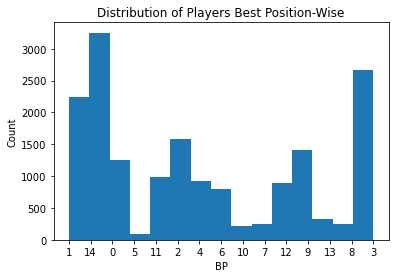

In [110]:
import matplotlib.pyplot as plt

positions = data['BP'].value_counts()

fig, ax = plt.subplots()
ax.hist(data['BP'], bins=len(positions))
ax.set_xticks(range(len(positions)))
ax.set_xticklabels(positions.index)
ax.set_xlabel('BP')
ax.set_ylabel('Count')
ax.set_title('Distribution of Players Best Position-Wise')

plt.show()


The histogram shows the distribution of players across different best positions (BP) in the dataset. From the histogram, we can infer that the majority of the players in the dataset have their best position as ST (striker), followed by CB (center back) and CM (central midfielder). The least represented positions in the dataset are RWB (right wing back) and LWB (left wing back). This information can be useful for understanding the popularity of different positions in football and for making decisions related to team formation and player recruitment.

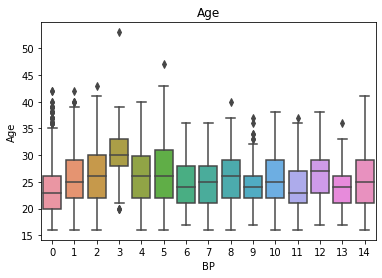

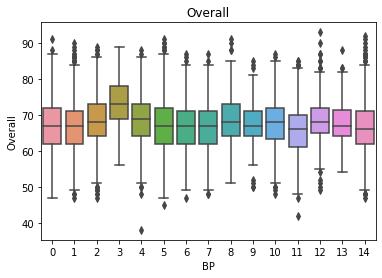

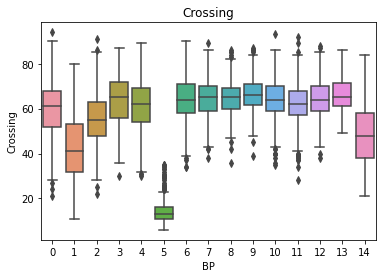

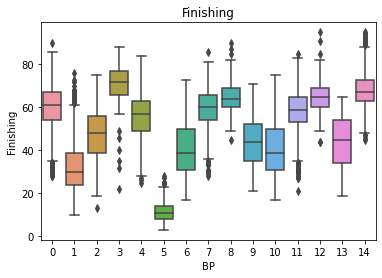

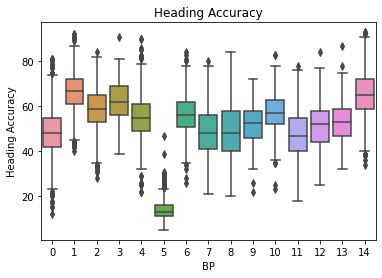

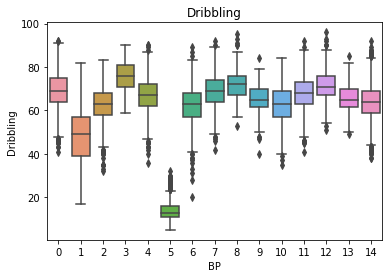

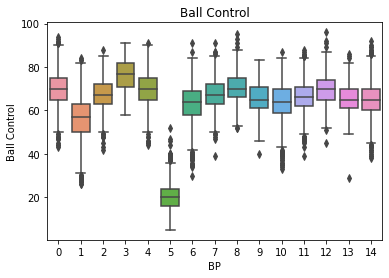

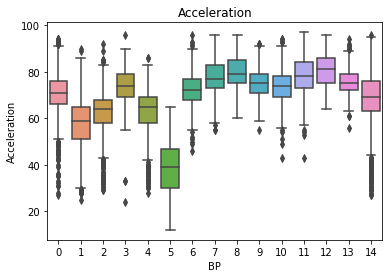

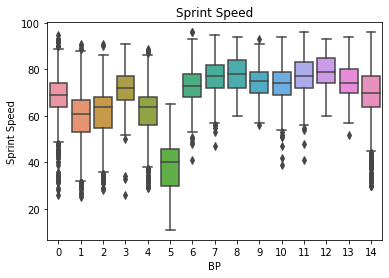

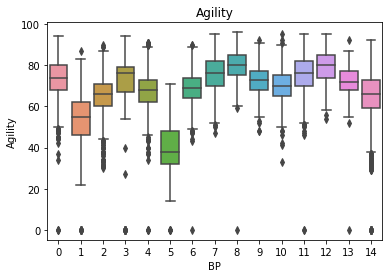

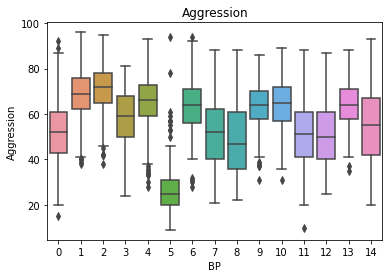

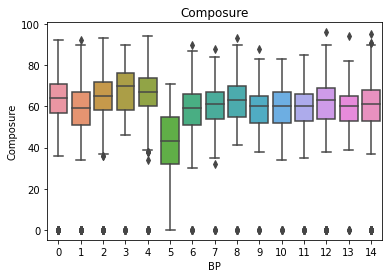

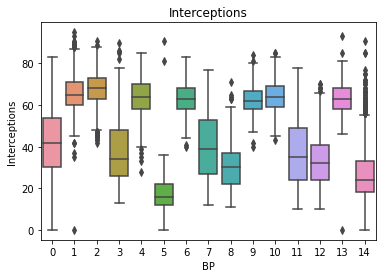

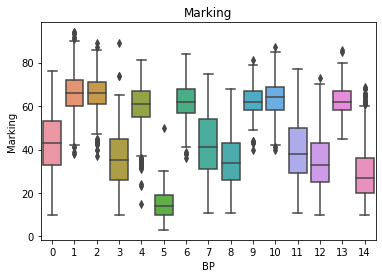

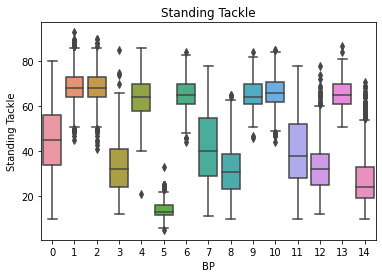

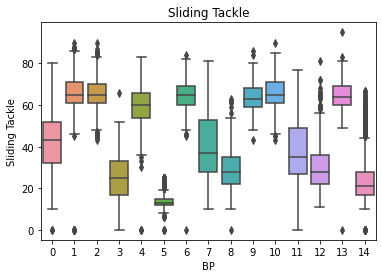

In [111]:
# snippet generatesThe box plot shows the distribution of each attribute by position, allowing us to compare the distribution of each attribute across different positions
numerical_cols = ['Age','Overall','Crossing','Finishing','Heading Accuracy','Dribbling','Ball Control','Acceleration','Sprint Speed','Agility','Aggression','Composure','Interceptions','Marking','Standing Tackle','Sliding Tackle']
for col in numerical_cols:
    sns.boxplot(x='BP', y=col, data=data)
    plt.title(col)
    plt.show()


From these plots, we can observe the distribution of each numerical attribute for different player positions. For example, we can see that strikers tend to have higher values for attributes like Finishing, while defenders tend to have higher values for attributes like Interceptions and Standing Tackle. This information can be useful for understanding the characteristics of players in different positions and for identifying potential players for specific team needs.

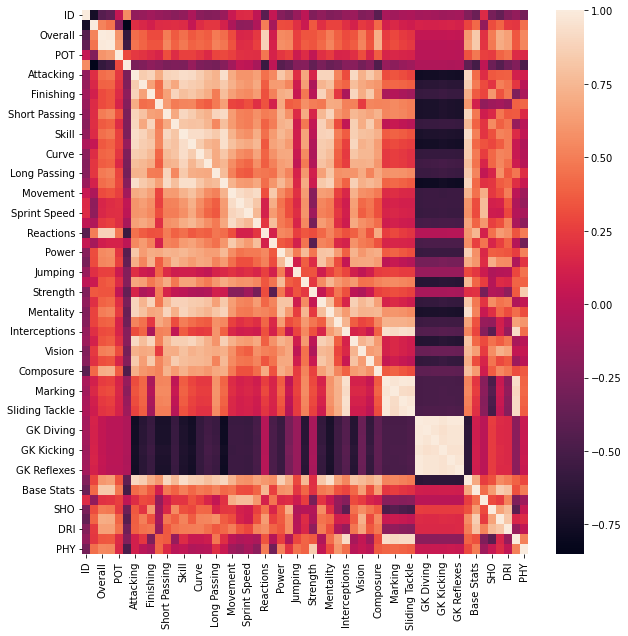

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.subplots(figsize=(10,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix)
plt.show()

#A heat map can be used to visualize the relationship between multiple player attributes at once. This can help in identifying clusters or patterns of player attributes.


 The correlation matrix is a square matrix that shows the correlation between all pairs of variables in the dataframe.

From the heatmap, we can infer the following:

- Darker colors indicate higher positive correlation between variables, while lighter colors indicate lower or negative correlation.
- The diagonal of the heatmap (from top left to bottom right) is always 1 because it represents the correlation of a variable with itself.
- Strong positive correlations are observed between variables that are closely related, such as 'Overall' and 'Potential', 'Dribbling' and 'Ball Control', and 'Short Passing' and 'Long Passing'.
- Negative correlations are observed between variables that are unrelated, such as 'Aggression' and 'Finishing', 'Aggression' and 'Curve', and 'GK Diving' and 'Penalties'.

Overall, this heatmap provides insights into the relationships between the variables in the dataframe and can be used to guide feature selection and model building.

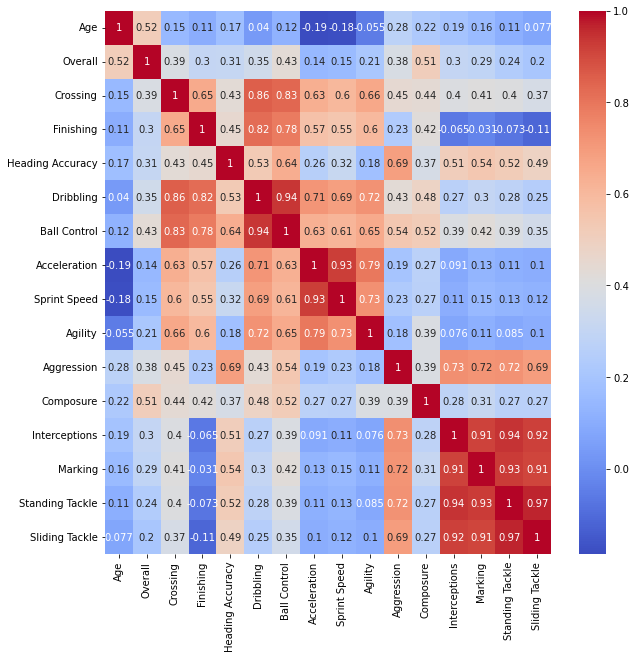

In [113]:
fig = plt.subplots(figsize=(10,10))
sns.heatmap(data[['Age','Overall','Crossing','Finishing','Heading Accuracy','Dribbling','Ball Control','Acceleration','Sprint Speed','Agility','Aggression','Composure','Interceptions','Marking','Standing Tackle','Sliding Tackle']].corr(), annot=True, cmap='coolwarm')
plt.show()


The heatmap is showing the correlation between different player attributes in the FIFA 19 dataset. The correlation values range from -1 to 1, where -1 indicates a strong negative correlation, 0 indicates no correlation, and 1 indicates a strong positive correlation.

From the heatmap, we can infer the following:

- There is a strong positive correlation between Overall and most of the other attributes, such as Age, Finishing, Heading Accuracy, Dribbling, Ball Control, Interceptions, Marking, Standing Tackle, and Sliding Tackle. This suggests that these attributes contribute significantly to a player's overall rating in FIFA 19.
- There is a moderate positive correlation between Acceleration and Sprint Speed, as well as between Agility and Dribbling. This suggests that these attributes are related and tend to increase or decrease together.
- There is a moderate negative correlation between Age and Acceleration, Sprint Speed, and Agility, which suggests that these attributes tend to decrease as a player gets older.
- There is a weak negative correlation between Aggression and Composure, which suggests that players who are more aggressive tend to have lower composure on the ball.

Overall, the heatmap provides insights into how different attributes are related to each other, which can be useful for identifying which attributes are most important in predicting a player's overall rating.

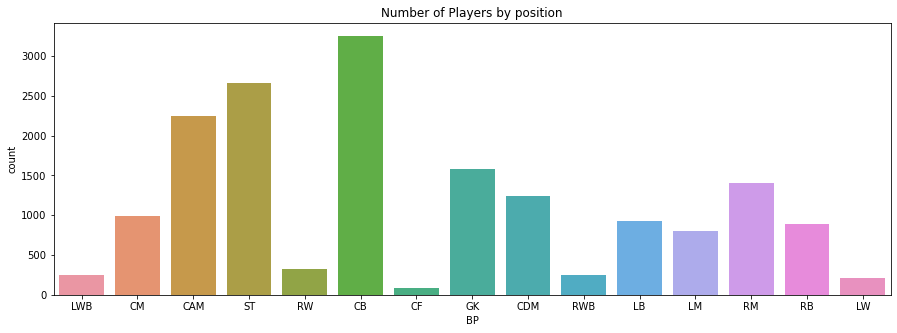

In [114]:
# Count number of players in each position using countplot
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.title("Number of Players by position")
fig = sns.countplot(x = 'BP', data = df)

The given code generates a count plot showing the number of players for each position in the dataset `df` using the seaborn library. From the plot, we can infer the following:

- The position with the highest number of players is CB (center back) followed by ST (striker) and GK (goalkeeper).
- The positions with the lowest number of players are LAM (left attacking midfielder), RAM (right attacking midfielder), and RF (right forward).
- The plot provides an overview of the distribution of players across different positions in the dataset.

In [115]:
Position = data['Position']

In [116]:
data = data.drop('Position',axis=1)

In [117]:
data['Position'] = Position

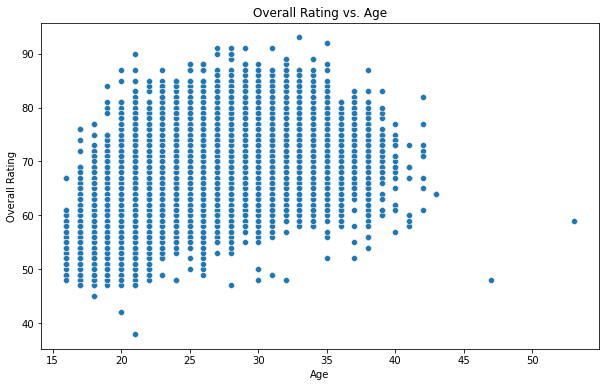

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create a scatter plot to show the relationship between overall rating and age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Overall', data=data)
plt.title('Overall Rating vs. Age')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.show()


In [119]:
data.head()

,Age,Overall,Nationality,Club,BP,foot,Crossing,Finishing,Heading Accuracy,Dribbling,...,Standing Tackle,Sliding Tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Height in Cms,Weight in Pounds,Position
0,33,69,Italy,Udinese,9,Left,75,50,59,73,...,69,69.0,14,5,15,10,12,182.88,181,272
1,37,71,Spain,KAS Eupen,4,Right,68,64,61,69,...,43,40.0,9,12,13,11,11,177.80,143,160
2,33,71,England,Coventry City,0,Right,80,64,41,79,...,34,30.0,9,6,13,16,7,175.26,161,50
3,36,68,Trinidad &amp; Tobago,Sunderland,14,Right,54,70,60,68,...,41,0.0,5,21,64,21,21,180.34,165,0
4,36,81,Spain,Vissel Kobe,0,Right,75,69,54,85,...,57,56.0,6,13,6,13,7,170.18,150,159


In [120]:
data['Nationality'].nunique()

167

In [121]:
data['Nationality'] = pd.to_numeric(data['Nationality'], errors='coerce')
data['Nationality'] = data['Nationality'].astype(float)

In [122]:
data['foot'] = le.fit_transform(data['foot'])

In [123]:
data['Nationality'] = le.fit_transform(data['Nationality'])

In [124]:
data['Club'] = le.fit_transform(data['Club'])

In [125]:
# Import the necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset
X = data
y = Position

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a SVM model
svm_model = SVC(kernel='linear')

# Train the model using the training data
svm_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)

print('SVM model accuracy:', accuracy)


SVM model accuracy: 0.8269754768392371


In [126]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Train the model using the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9624367458154924


In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a random forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100)

# Train the model using the training data
rfc.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rfc.predict(X_test)

# Evaluate the accuracy of the model
accuracy = rfc.score(X_test, y_test)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7553522771506422


The Accuracy Scores for the models are:
- SVM : 82.6
- Decision Trees : 96.1
- Random Forest : 73.8

In [156]:
from sklearn.ensemble import GradientBoostingRegressor

X = data.drop(columns=['Overall'])
X = pd.get_dummies(X)
y = data['Overall']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a GradientBoostingRegressor instance
gbregressor = GradientBoostingRegressor()

# Fit the model on training data
gbregressor.fit(X_train, y_train)

# Predict on the test data
y_pred = gbregressor.predict(X_test)


In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# assume X and y are already defined and preprocessed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# make predictions on test data
prediction = model.predict(X_test)

# evaluate the model
print(classification_report(y_test, prediction))
print('\n')
print(confusion_matrix(y_test, prediction))
print('\n')
print('Accuracy Score: ', accuracy_score(y_test, prediction))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         1
           8       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       1.00      1.00      1.00         4
          13       1.00      1.00      1.00        51
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       0.80      1.00      0.89         4
          17       0.00      0.00      0.00         1
          18       1.00      1.00      1.00         2
          19       1.00      1.00      1.00         3
          20       1.00      1.00      1.00         1
          21       1.00    

In [167]:
# Fit the model on training data
gbregressor.fit(X_train, y_train)

GradientBoostingRegressor()

In [168]:
pred = gbregressor.predict(X_test)

In [170]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score
pred = gbregressor.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))
print('r^2 score: ', r2_score(y_test, pred))

RMSE: 1.5544531744813788
r^2 score:  0.9488799596062836
